In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [3]:
consumer_key = 'eB1MnSkURFn1g2OwqkUP4Cgne'
consumer_secret = 'pW9rMY7D5ErWe9Ky8z05HczHeifcrJ7yE6omreTNjePdUyRl83'
access_token = '172835284-4v3mtpWzrazHN861ew2Q3mDtntMqylttjOtTqXTr'
access_token_secret = 'fct7pJSujNpK5IcSKUVecBCT0PX8ACbdJYnYzAy0PSobl'

In [4]:
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [5]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [ ]:
Topic=["Udaipur"]
get_tweets(Topic , Count=100)

In [ ]:
df.tail(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
91,2023-01-27 08:12:46,Mitalee Pawar,False,@Nagasur33712963 Yss thts why this week rula r...,0,0,
92,2023-01-27 08:09:00,Virendra Shaktawat,False,@SamsungIndia @Samsung #horrible #experiences ...,0,1,
93,2023-01-27 08:02:20,Springboard Memes Adda,False,Follow @sbmemesadda \n\nOther social media : \...,68,0,"Jaipur, India"
94,2023-01-27 07:50:03,abhi_yrkkh,False,No but half of the fd is filled with delusiona...,5,2,
95,2023-01-27 07:48:19,Raj Upadhyay,False,"@kamaalrkhan Completely wrong analysis, recent...",1,0,
96,2023-01-27 07:47:39,UdaipurTimes,False,The year's most anticipated film PATHAAN is ru...,0,0,Udaipur
97,2023-01-27 07:47:25,Saksham Singh,False,It's only the first month since semester has s...,1,0,
98,2023-01-27 07:43:32,Supriya .b.s,False,@floating_point_ @_sporsha_ @OnlyLoveHarshuu A...,0,0,
99,2023-01-27 07:38:48,Mitalee Pawar,False,Infact last week episodes were really good bt ...,4,0,
100,2023-01-27 07:35:52,Tanjiro( harry),False,SAH Polymers Ltd has successfully commissione...,3,2,mainland


In [ ]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [ ]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-01-28 03:09:56,HRH Hotels,False,"Your dedication, determination, and vision ins...",0,0,"Udaipur, India",your dedication determination and vision inspi...
1,2023-01-28 02:58:46,I LOVE PRANALI,False,I only tolerated udaipur scenes bcz they menti...,5,0,,i only tolerated udaipur scenes bcz they menti...
2,2023-01-28 02:58:06,Uttam Pegu/乌塔姆·佩古/Umme Pe'gu/उत्तम पेगू/উত্তম ...,False,@TheNeelkanth @NikonIndia @WildlifeMag @BBCEar...,0,0,India,rajasthan
3,2023-01-28 02:35:18,Rt9240,False,So Manjiri going to d*e once once akshu lands ...,1,0,"Bellevue, WA",so manjiri going to d e once once akshu lands ...
4,2023-01-28 02:32:34,Rahul Sharma 🏳️‍🌈,False,This might just be the best picture I've ever ...,11,0,"New Delhi, India",this might just be the best picture i ve ever ...


In [ ]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2023-01-28 03:09:56,HRH Hotels,False,"Your dedication, determination, and vision ins...",0,0,"Udaipur, India",your dedication determination and vision inspi...,Positive
1,2023-01-28 02:58:46,I LOVE PRANALI,False,I only tolerated udaipur scenes bcz they menti...,5,0,,i only tolerated udaipur scenes bcz they menti...,Neutral
2,2023-01-28 02:58:06,Uttam Pegu/乌塔姆·佩古/Umme Pe'gu/उत्तम पेगू/উত্তম ...,False,@TheNeelkanth @NikonIndia @WildlifeMag @BBCEar...,0,0,India,rajasthan,Neutral
3,2023-01-28 02:35:18,Rt9240,False,So Manjiri going to d*e once once akshu lands ...,1,0,"Bellevue, WA",so manjiri going to d e once once akshu lands ...,Neutral
4,2023-01-28 02:32:34,Rahul Sharma 🏳️‍🌈,False,This might just be the best picture I've ever ...,11,0,"New Delhi, India",this might just be the best picture i ve ever ...,Positive


In [ ]:
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @Smitagopal She will when akshu gonna come to udaipur lol😂😂😂😂😭

Clean tweet:
 she will when akshu gonna come to udaipur lol

Sentiment of the tweet:
 Neutral


In [ ]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Udaipur'] are : 101
Total Positive Tweets are : 46
Total Negative Tweets are : 17
Total Neutral Tweets are : 38


In [ ]:
df["Sentiment"].value_counts()

Positive    46
Neutral     38
Negative    17
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

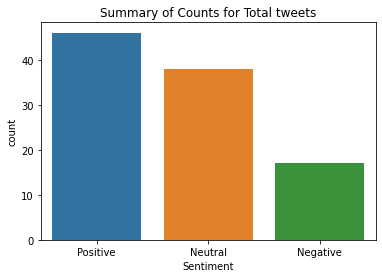

In [ ]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

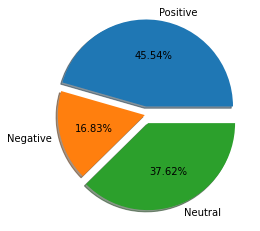

In [ ]:
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

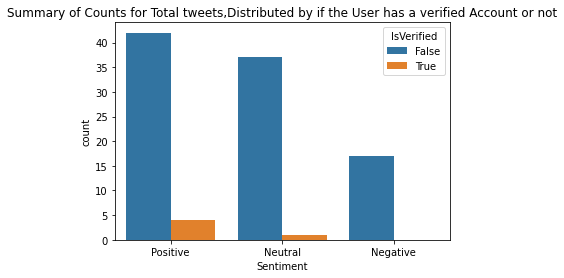

In [ ]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")